In [ ]:
# This is for compatibility with google colab
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/MultiOmicsIntegration/comp-401

Mounted at /content/drive
/content/drive/MyDrive/MultiOmicsIntegration/comp-401


In [ ]:
!pip install gseapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.0 MB/s eta 0:00:00


In [ ]:
import json
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
from gseapy import Biomart

In [ ]:
%cd /content/drive/MyDrive/MultiOmicsIntegration/comp-401/notebooks

/content/drive/MyDrive/MultiOmicsIntegration/comp-401/notebooks


# KIPAN Staging

In [ ]:
# Loading in marker genes per modality
with open("results/kipan/staging/marker_genes.json",'r+') as file:
    genes = json.load(file)

In [ ]:
rna = [item.removesuffix('_rna') for item in genes['rna']]
meth = [item.removesuffix('_meth') for item in genes['meth']]
rppa = [item.split('|')[0] for item in genes['rppa']]

In [ ]:
gene_list = []
gene_list.extend(rna)
gene_list.extend(meth)
gene_list.extend(rppa)

In [ ]:
','.join(gene_list)

'LCN1,ITIH4,KERA,CRABP1,NCAM1,C1orf61,GPR109B,FAM101A,VWA3A,H19,MFI2,WNK2,ADAM6,IGJ,BDKRB2,THRSP,LAMC2,MGC29506,LOC642587,SLC6A19,TMPRSS3,CPXM1,MCHR2,OR5C1,SPANXN3,FBP2,CALML5,SERPINE1,TM4SF4,CCDC91,XAGE1D,POU2AF1,DHRS2,CGB8,CXCL17,KRT19,CHST2,MXRA5,AEBP1,GRIA2,TSHZ2,PPP1R3C,SLC4A10,HIF3A,OPRM1,GLDN,MAP3K1,C19orf60,CDKL4,OTOP3,PYY,NFKBIZ,MIR214,CD14,KRTAP19-5,RAF1,CDKN1B,STMN1,FN1,CAV1,ERBB2,PEA15,CHEK2,C12ORF5,MAP2K1,PECAM1,EEF2K,ERBB3,TP53BP1,PREX1,EIF4E'

In [ ]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr_reactome = gp.enrichr(gene_list=gene_list, # or "./tests/data/gene_list.txt",
                 gene_sets=['Reactome_2022'],
                 organism='Human',
                 cutoff=0.5,
                 outdir='results/kipan/staging/reactome_enr'
                )

In [ ]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr_go = gp.enrichr(gene_list=gene_list, # or "./tests/data/gene_list.txt",
                 gene_sets=['GO_Molecular_Function_2021'],
                 organism='Human',
                 cutoff=0.5,
                 outdir=None, # don't write to disk
                )

In [ ]:
enr_reactome.results.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2022,GRB7 Events In ERBB2 Signaling R-HSA-1306955,2/5,0.000123,0.036129,0,0,192.521739,1732.716959,ERBB3;ERBB2
1,Reactome_2022,RAF/MAP Kinase Cascade R-HSA-5673001,6/271,0.000401,0.036129,0,0,6.849579,53.570775,MAP2K1;ERBB3;PEA15;ERBB2;FN1;NCAM1
2,Reactome_2022,MAPK1/MAPK3 Signaling R-HSA-5684996,6/277,0.000451,0.036129,0,0,6.695884,51.592295,MAP2K1;ERBB3;PEA15;ERBB2;FN1;NCAM1
3,Reactome_2022,Signal Transduction R-HSA-162582,19/2465,0.000744,0.036129,0,0,2.611619,18.812606,MAP2K1;CDKN1B;CAV1;SERPINE1;CRABP1;FN1;LAMC2;O...
4,Reactome_2022,Signaling By Non-Receptor Tyrosine Kinases R-H...,3/52,0.000836,0.036129,0,0,17.899160,126.841563,CDKN1B;ERBB3;ERBB2


In [ ]:
enr_go.results.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Molecular_Function_2021,ErbB-3 class receptor binding (GO:0043125),2/5,0.000123,0.015795,0,0,192.521739,1732.716959,ERBB3;ERBB2
1,GO_Molecular_Function_2021,potassium channel inhibitor activity (GO:0019870),2/9,0.000440,0.028170,0,0,82.492754,637.534355,CAV1;WNK2
2,GO_Molecular_Function_2021,protein serine/threonine kinase activity (GO:0...,6/344,0.001387,0.059191,0,0,5.350296,35.207151,CDKL4;MAP2K1;MAP3K1;CHEK2;WNK2;RAF1
3,GO_Molecular_Function_2021,metallocarboxypeptidase activity (GO:0004181),2/29,0.004742,0.125903,0,0,21.365539,114.335228,CPXM1;AEBP1
4,GO_Molecular_Function_2021,phosphatase binding (GO:0019902),3/114,0.007781,0.125903,0,0,7.876789,38.250180,CDKN1B;PPP1R3C;ERBB2


<Axes: title={'center': 'KIPAN Staging Enrichment Analysis - Reactome'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

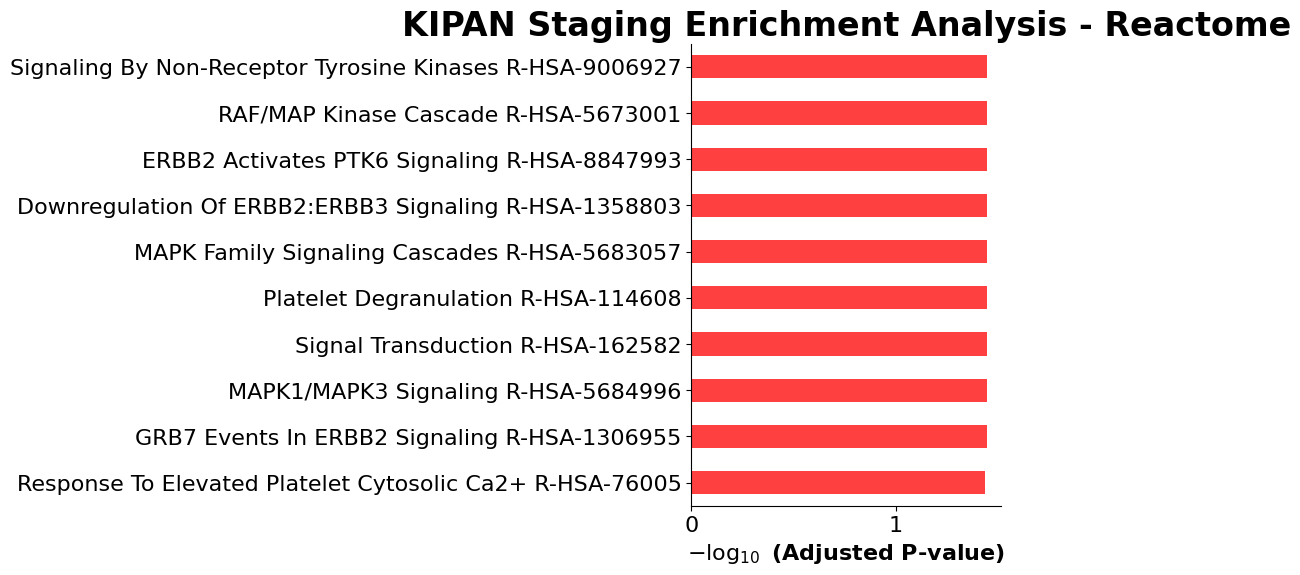

In [ ]:
from gseapy.plot import barplot, dotplot

barplot(enr_reactome.res2d,title='KIPAN Staging Enrichment Analysis - Reactome',color = 'r')

<Axes: title={'center': 'Enrichment Analysis - GO Molecular Function'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

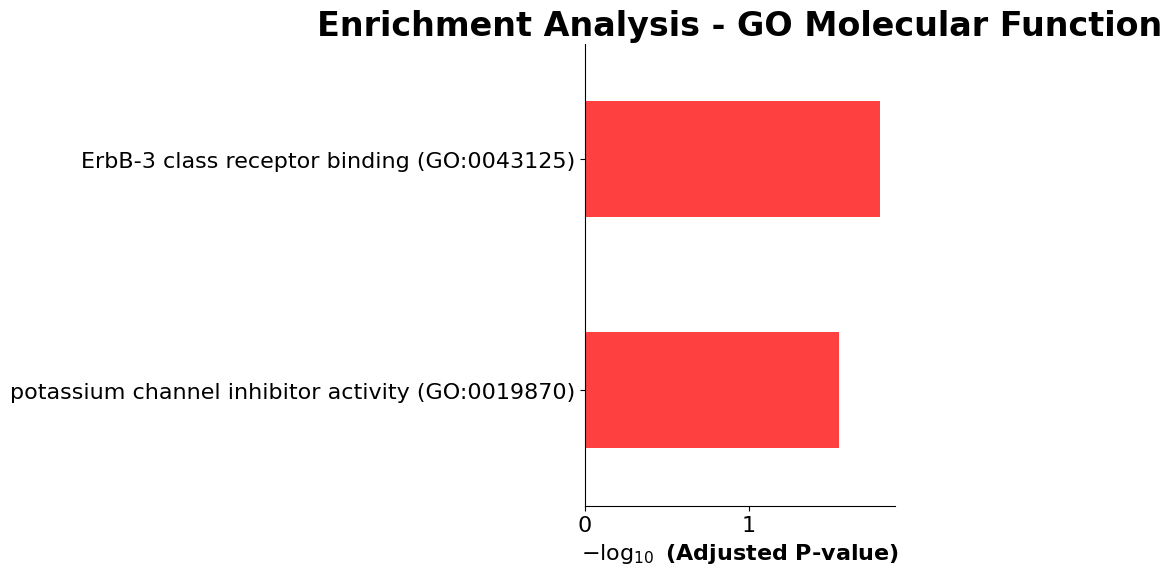

In [ ]:
barplot(enr_go.res2d,title='Enrichment Analysis - GO Molecular Function',color = 'r')

# KIPAN Subtyping

In [ ]:
# Loading in marker genes per modality
with open("results/kipan/subtyping/marker_genes.json",'r+') as file:
    genes = json.load(file)

In [ ]:
rna = [item.removesuffix('_rna') for item in genes['rna']]
cnv = [item.removesuffix('_cnv') for item in genes['cnv']]
rppa = [item.split('|')[0] for item in genes['rppa']]

gene_list = []
gene_list.extend(rna)
gene_list.extend(cnv)
gene_list.extend(rppa)

','.join(gene_list)

'LARGE,SEMA3E,ZNF716,MIR3147,ZNF479,RN7SL816P,SGCG,CDH18,CLIC6,CADM2,AKAP4,RN7SL740P,LINC00310,BIVM,RCAN1,TPGS2,OXR1,LINC00283,TEX30,KDELC1,ABRA,CCNB3,GPR56,MIR5688,LINC00649,FAR2,snoU13|ENSG00000238865.1,ATP5O,PCLO,RN7SL109P,MIS18A,DGKK,ANKRD11,RN7SKP284,MIR3920,C8orf86,RHOV,ZC3H12B,SPINT1,CELF4,LAS1L,OPHN1,SLC14A2,VGLL3,MYO5B,MIR4795,TMCC1,TRPC6,CDC73,PLXNA2,CAMK1D,PGR,SLC30A10,SNTG1,DSG3,CCDC120,PAK7,SLC39A11,CDH2,PRKAA1,ERBB2,CCNB1,ERBB2,DVL3,RAB25,TGM2,EIF4EBP1,GATA3,AKT1S1,PIK3R1,MAP2K1,EGFR,ACVRL1,BAK1,CHEK2,MSH2,AR,YWHAZ,EGFR,IRS1,EIF4G1,YBX1,ERCC1,MYH11,PEA15,PARK7,PRKCD,SRC,PREX1,PRKAA1,STK11,XBP1,IGFBP2,BCL2L11,RICTOR,ESR1,BIRC2 ,BAX,RB1,ERBB3,CDH3,CAV1,TSC2,LCK,RBM15,XRCC1,SFRS1,RPS6,BRAF,EEF2,EIF4E,CCNE1,FRAP1,MAPK14,PEA15,PCNA,SMAD4,SERPINE1,MRE11A,NRAS'

In [ ]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr_reactome = gp.enrichr(gene_list=gene_list, # or "./tests/data/gene_list.txt",
                 gene_sets=['Reactome_2022'],
                 organism='Human',
                 cutoff=0.5,
                 outdir='results/kipan/subtyping/reactome_enr', # don't write to disk
                )

In [ ]:
enr_reactome.results.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2022,Signal Transduction R-HSA-162582,45/2465,3.663913e-13,2.634354e-10,0,0,4.573856,130.972717,ACVRL1;PRKAA1;IRS1;SRC;SERPINE1;PIK3R1;GATA3;Y...
1,Reactome_2022,PI3K/AKT Signaling In Cancer R-HSA-2219528,11/105,2.430259e-11,8.736781e-09,0,0,22.055724,539.051570,ERBB3;IRS1;LCK;SRC;AKT1S1;ERBB2;TSC2;RICTOR;PI...
2,Reactome_2022,MTOR Signaling R-HSA-165159,8/41,8.166002e-11,1.957118e-08,0,0,44.558923,1035.035001,PRKAA1;STK11;RPS6;AKT1S1;EIF4EBP1;TSC2;EIF4E;E...
3,Reactome_2022,Diseases Of Signal Transduction By Growth Fact...,17/424,3.842101e-10,6.906176e-08,0,0,8.217532,178.154701,SMAD4;MAP2K1;IRS1;SRC;RPS6;TSC2;BRAF;PIK3R1;ES...
4,Reactome_2022,Signaling By Receptor Tyrosine Kinases R-HSA-9...,18/496,5.534705e-10,7.958906e-08,0,0,7.456835,158.941050,MAP2K1;IRS1;SRC;CAV1;PRKCD;BRAF;PIK3R1;MAPK14;...


<Axes: title={'center': 'KIPAN Subtyping Enrichment Analysis - Reactome'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

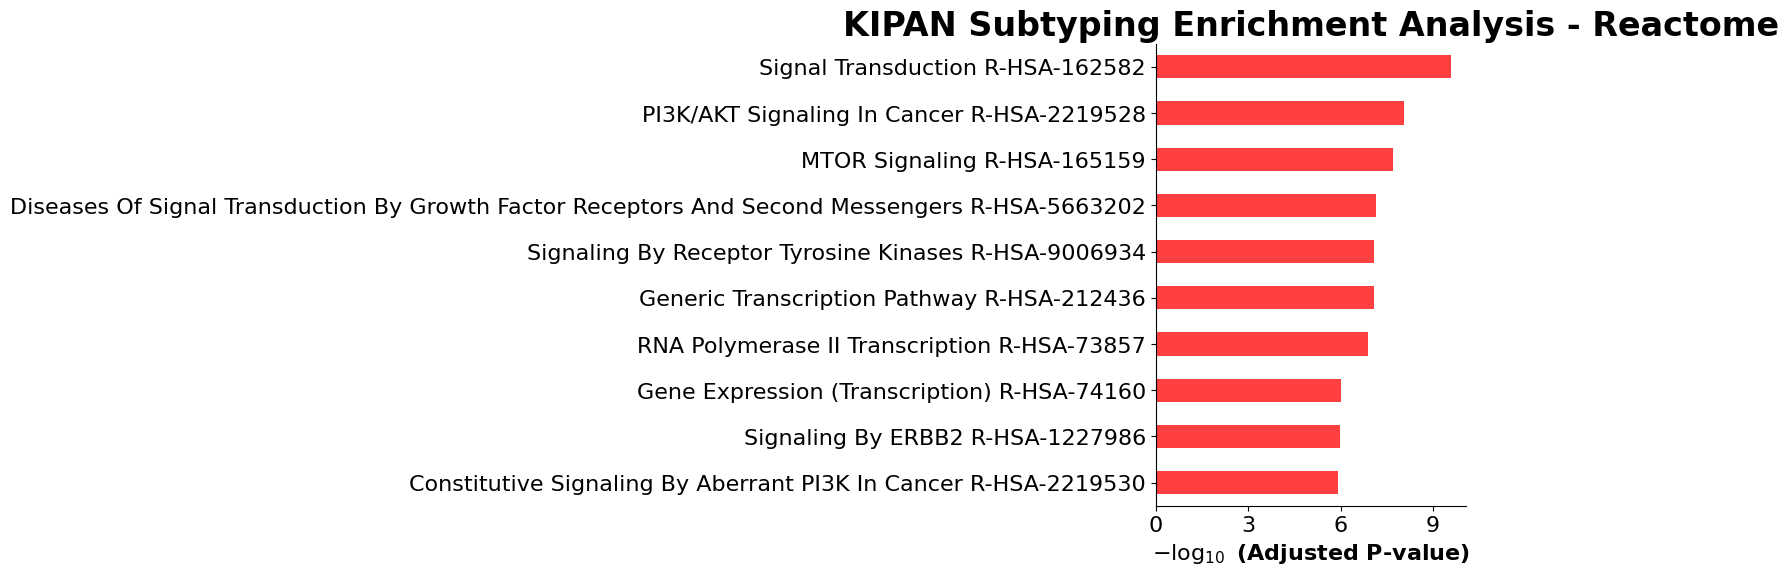

In [ ]:
barplot(enr_reactome.res2d,title='KIPAN Subtyping Enrichment Analysis - Reactome',color = 'r')

# BRCA Subtyping

In [ ]:
# Loading in marker genes per modality
with open("results/brca/marker_genes.json",'r+') as file:
    genes = json.load(file)

In [ ]:
rna = [item.removesuffix('_rna') for item in genes['rna']]
mirna = [item.removesuffix('_cnv') for item in genes['mirna']]
meth = [item.split('|')[0] for item in genes['methylation']]

gene_list = []
gene_list.extend(rna)
gene_list.extend(mirna)
gene_list.extend(meth)

','.join(gene_list)

'PLUNC,KCNK3,ITGB6,CRISP1,PIGR,S100G,PCGEM1,DIO1,COX8C,CARTPT,UGT2B11,SERPINA5,KRTAP3-3,SERPINB5,HPX,MKX,CCDC37,BASE,SLCO3A1,ANPEP,PKP1,KRT5,AMY1A,PGLYRP2,TMEM158,LOC96610,KRT40,MS4A1,SLC39A8,MAGEB18,TEX14,OXTR,TCN1,OC90,C2CD4A,EPHA3,TUBA3D,B4GALNT2,KRT17,GAGE12D,MYO7A,CDH4,DHRS2,DHRS9,CFD,GDF15,GDAP2,HSD3B2,REPS2,GAGE4,AKR1D1,GAGE2D,CALML5,ADCY1,MYBPC1,PRR4,PRR15L,FMO2,SMEK3P,FGL1,KIAA1467,SYNPO2L,C20orf114,C11orf30,CYP4B1,CYP1A1,PLIN1,NRAS,CTSK,NTS,SLC38A8,CRLF1,SHISA2,NDP,COL2A1,PROM1,PXDNL,CHRNA9,CBLN2,SCGB1D2,SCGB1C1,CD79A,DCXR,GPR155,MAL,MATN1,LAMC3,LCN2,SPON2,KIAA1383,FAM65C,AGXT,APCDD1,KERA,KCNC2,TF,VNN1,KRT13,KRT14,HTR3A,BAI2,ELF5,BEX1,WDR3,GPR12,KLK10,POU3F2,RSPO1,GP2,HBB,HIBADH,RGS2,GIP,KCTD14,INSM1,HTR7P1,CEACAM5,GGTLC2,NEFH,CP,LBP,FAM89A,CYP4Z1,CYP4X1,CYP4F8,DNAH17,MS4A7,NPY6R,EIF4EBP1,MED1,ENPP3,ENTPD5,MAOB,MAEL,LSAMP,CSPG4,PDZK1IP1,PGAP3,LRP1B,LOC255167,PHOSPHO1,S100A1,PPAPDC1B,UQCRFS1,BPIL1,AMBP,SELL,CADPS,TFCP2L1,UCA1,UGT2B28,SYT1,SUSD2,ADAMTSL4,TKTL1,SCGB2A2,C8orf85,A

In [ ]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr_reactome = gp.enrichr(gene_list=gene_list, # or "./tests/data/gene_list.txt",
                 gene_sets=['Reactome_2022'],
                 organism='Human',
                 cutoff=0.5,
                 outdir='results/brca/reactome_enr', # don't write to disk
                )

In [ ]:
enr_reactome.results.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2022,Metal Sequestration By Antimicrobial Proteins ...,5/6,3.126694e-07,0.000172,0,0,137.814286,2064.198836,S100A7A;LCN2;S100A9;S100A8;S100A7
1,Reactome_2022,Keratinization R-HSA-6805567,24/208,3.567676e-07,0.000172,0,0,3.660410,54.343108,KRT82;SPRR3;KRT81;CDSN;KRT4;KRT1;KLK5;KRT13;KR...
2,Reactome_2022,Defective GALNT12 Causes CRCS1 R-HSA-5083636,7/18,1.487469e-06,0.000360,0,0,17.581141,235.911394,MUC2;MUC16;MUCL1;MUC17;MUC5B;MUC20;MUC4
3,Reactome_2022,Defective GALNT3 Causes HFTC R-HSA-5083625,7/18,1.487469e-06,0.000360,0,0,17.581141,235.911394,MUC2;MUC16;MUCL1;MUC17;MUC5B;MUC20;MUC4
4,Reactome_2022,Defective C1GALT1C1 Causes TNPS R-HSA-5083632,7/19,2.283597e-06,0.000442,0,0,16.115210,209.332693,MUC2;MUC16;MUCL1;MUC17;MUC5B;MUC20;MUC4


<Axes: title={'center': 'BRCA Subtyping Enrichment Analysis - Reactome'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

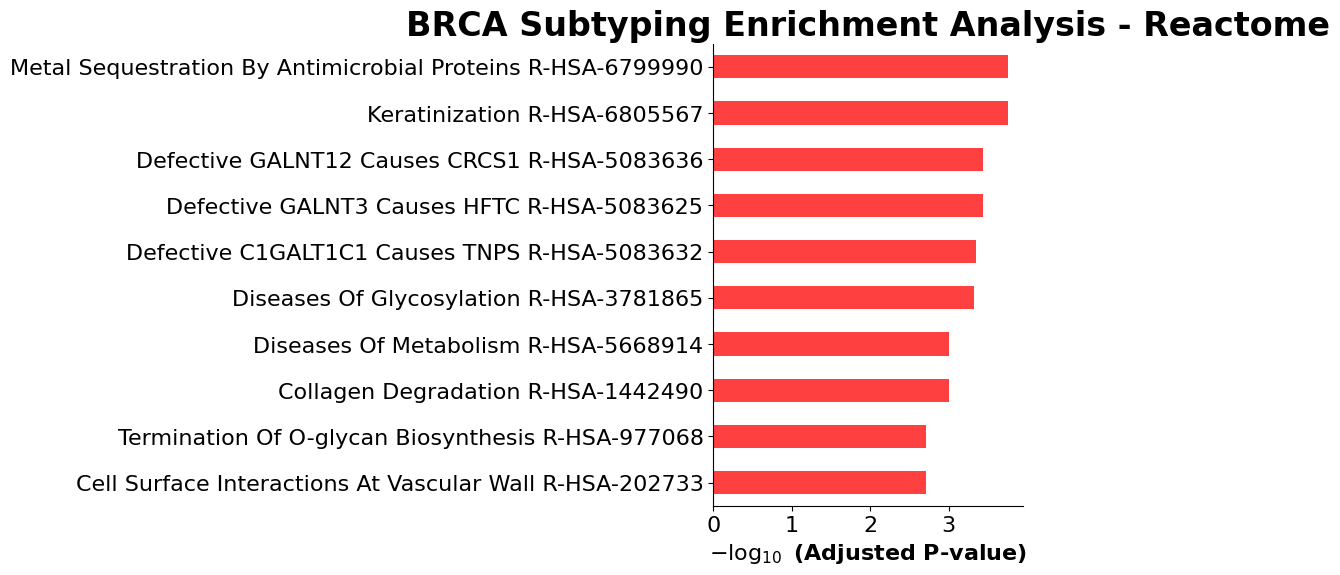

In [ ]:
barplot(enr_reactome.res2d,title='BRCA Subtyping Enrichment Analysis - Reactome',color = 'r')